In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

salary_data = pd.DataFrame({
    "yoe":[4, 6 , 3, 8, 9, 7],
    "salary":[10, 14 , 8 , 14, 17, 11]
})

In [ ]:
salary_data

,yoe,salary
0,4,10
1,6,14
2,3,8
3,8,14
4,9,17
5,7,11


In [ ]:
x = salary_data[['yoe']]
y = salary_data['salary']

In [ ]:
X_new = pd.concat((x , x**2 , x**3), axis=1)
X_new.columns = ['yoe','yoe_squared' , 'yoe_cube']
X_new

,yoe,yoe_squared,yoe_cube
0,4,16,64
1,6,36,216
2,3,9,27
3,8,64,512
4,9,81,729
5,7,49,343


In [ ]:
from sklearn.linear_model import LinearRegression
model_non_linear = LinearRegression()

model_non_linear.fit(X_new,y)

LinearRegression()

In [ ]:
yh = model_non_linear.predict(X_new)

In [ ]:
xt = np.arange(3,10).reshape(7,1)
xt_new = np.hstack((xt , xt**2 , xt**3))
xt_new

array([[  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [ ]:
yt = model_non_linear.predict(xt_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


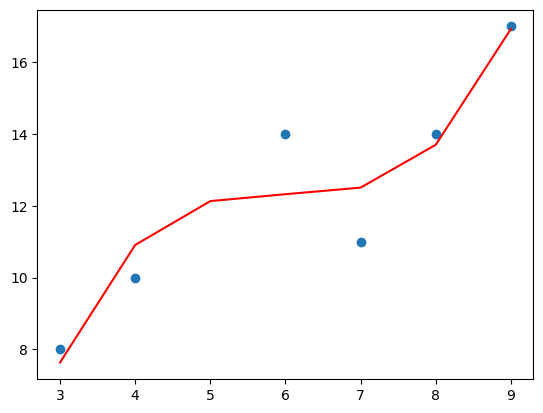

In [ ]:
plt.scatter(x , y)

plt.plot(xt,yt,'r')
plt.show()

**Non-Linear Model for advertising data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Advertising.csv',
                 index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


**Non-linear model using TV as feature**

In [ ]:
x = df[['TV']]
y = df['sales']

In [ ]:
#prepare data for 2-degree non linear regression

x_nl = pd.concat((x, x**2, x**3),axis=1)
x_nl.columns = ['TV', 'TV_squared', 'TV_cube']
x_nl

,TV,TV_squared,TV_cube
1,230.1,52946.01,1.218288e+07
2,44.5,1980.25,8.812112e+04
3,17.2,295.84,5.088448e+03
4,151.5,22952.25,3.477266e+06
5,180.8,32688.64,5.910106e+06
...,...,...,...
196,38.2,1459.24,5.574297e+04
197,94.2,8873.64,8.358969e+05
198,177.0,31329.00,5.545233e+06
199,283.6,80428.96,2.280965e+07


In [ ]:
from sklearn.linear_model import LinearRegression

model_nl_tv = LinearRegression()

model_nl_tv.fit(x_nl,y)

LinearRegression()

In [ ]:
model_nl_tv.coef_

array([ 9.64341770e-02, -3.15222433e-04,  5.57199796e-07])

In [ ]:
#Evaluate model performance

ypred_nl = model_nl_tv.predict(x_nl)

In [ ]:
mae_nl_model = abs(y - ypred_nl).mean()
print(mae_nl_model )

2.5448260647499454


**Non-linear model using TV & radio as feature**

In [ ]:
salary_data = pd.DataFrame({
    "yoe":[4, 6 , 3, 8, 9, 7],
    "clients":[3,4,2,6,7,6],
    "salary":[10, 14 , 8 , 14, 17, 11]
})

In [ ]:
salary_data

,yoe,clients,salary
0,4,3,10
1,6,4,14
2,3,2,8
3,8,6,14
4,9,7,17
5,7,6,11


In [ ]:
x = salary_data[['yoe', 'clients']]
x

,yoe,clients
0,4,3
1,6,4
2,3,2
3,8,6
4,9,7
5,7,6


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

pol.fit(x)

#Transform your data for 2 degree non - linear regression
x_pol= pol.transform(x)
x_pol

array([[ 1.,  4.,  3., 16., 12.,  9.],
       [ 1.,  6.,  4., 36., 24., 16.],
       [ 1.,  3.,  2.,  9.,  6.,  4.],
       [ 1.,  8.,  6., 64., 48., 36.],
       [ 1.,  9.,  7., 81., 63., 49.],
       [ 1.,  7.,  6., 49., 42., 36.]])

In [ ]:
y = salary_data['salary']
y

,salary
0,10
1,14
2,8
3,14
4,17
5,11


In [ ]:
from sklearn.linear_model import LinearRegression
model_nl_salary = LinearRegression()

model_nl_salary.fit(x_pol,y)

LinearRegression()

In [ ]:
print(model_nl_salary.coef_)
print(model_nl_salary.intercept_)

[ 0.          0.89278455 -0.62449187  0.81216125 -1.50643631  0.72679539]
6.014566395663957


In [ ]:
ypred_salary_nl = model_nl_salary.predict(x_pol)

mae_salary_nl = abs(y - ypred_salary_nl).mean()
print(mae_salary_nl)

0.6910569105691037


**Apply 2 degree non-linear transformation on advertising data (TV,radio) and build a predictive model**

  * compare the non-linear model performance with linear model performance that we created earlier